In [185]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 12 kB/s  eta 0:00:014   |█████████████▋                  | 70.9 MB 2.9 MB/s eta 0:00:34     |█████████████▉                  | 71.8 MB 2.9 MB/s eta 0:00:34
Note: you may need to restart the kernel to use updated packages.


In [1]:
from mlbase.db import MLData, Table
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from statsmodels.regression.linear_model import OLSResults
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import shap
import os
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sn
import graphviz as gr
from graphviz import Digraph
import sys
import xgboost
from collections import Counter

/usr/local/lib/python3.8/dist-packages/MLBase-0.3.3-py3.8.egg/mlbase/db/table.py:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
/usr/local/lib/python3.8/dist-packages/MLBase-0.3.3-py3.8.egg/mlbase/db/table.py:119: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [173]:
!conda install python-graphviz

/bin/bash: conda: command not found


In [78]:
os.environ['OMP_NUM_THREADS'] = '20'

In [2]:
db = MLData(db = 'postgres', host = 'localhost')

Password for user julia_shaliapina: ········


In [3]:
#Считываем данные с базы для Москвы, ДТП за 2019 год
df = pd.read_sql('''select * from julia_shaliapina.result_1 where city_id = 20''', db.engine)

In [407]:
#Данные необходимо перемешать

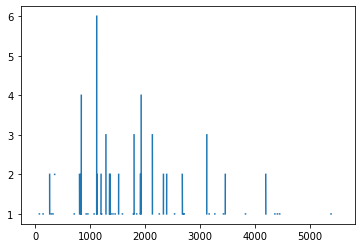

In [408]:
plt.plot(df['dtp'])

In [409]:
#Преобладают участки без ДТП (при этом в данных присутствуют только участки, на которых проходят дороги), далее с большим отрывом идут участки с 1, 2, 3 и более авариями по убыванию числа участком с соответствующим числом аварий.

In [410]:
plt.bar(Counter(df['dtp']).keys(), Counter(df['dtp']).values())

<BarContainer object of 5086 artists>

Error in callback <function flush_figures at 0x7f2d951e9310> (for post_execute):


KeyboardInterrupt: 

In [411]:
pd.set_option('display.max_columns', None)
df.head()

,city_id,square_id,org_number,bar,restaurant,banquet,police,bookmaker,church,airport,cams,dtp,airport_100,banquet_100,bar_100,book_100,church_100,police_100,restaurant_100,airport_200,banquet_200,bar_200,book_200,church_200,police_200,restaurant_200,airport_300,airport_500,airport_1000,airport_1500,banquet_300,banquet_500,banquet_1000,banquet_1500,bar_300,bar_500,bar_1000,bar_1500,book_300,book_500,book_1000,book_1500,church_300,church_500,church_1000,church_1500,police_300,police_500,police_1000,police_1500,restaurant_300,restaurant_500,restaurant_1000,restaurant_1500,cam_radii_100,cam_radii_300,cam_radii_500,cam_radii_1000,flats_100,flats_200,flats_300,flats_500,flats_1000,flats_1500,autoschool,kindergarden,school
0,20.0,90127.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,6.0,20.0,2,4,4,10,NaN,NaN,NaN,NaN,2.0,6930.0,0,0,0
1,20.0,90164.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,8.0,8.0,1,1,1,10,NaN,NaN,NaN,NaN,NaN,491.0,0,0,0
2,20.0,110602.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,7.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,7.0,17.0,1,1,1,1,NaN,NaN,NaN,NaN,4105.0,18737.0,0,0,0
3,20.0,41133.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,NaN,1.0,2.0,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,12.0,23.0,1,1,2,10,NaN,NaN,NaN,161.0,8209.0,25517.0,0,0,0
4,20.0,41137.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,11.0,13.0,23.0,1,1,5,11,NaN,NaN,NaN,NaN,4947.0,21909.0,0,0,0


In [4]:
df.columns

Index(['city_id', 'square_id', 'org_number', 'bar', 'restaurant', 'banquet',
       'police', 'bookmaker', 'church', 'airport', 'cams', 'dtp',
       'airport_100', 'banquet_100', 'bar_100', 'book_100', 'church_100',
       'police_100', 'restaurant_100', 'airport_200', 'banquet_200', 'bar_200',
       'book_200', 'church_200', 'police_200', 'restaurant_200', 'airport_300',
       'airport_500', 'airport_1000', 'airport_1500', 'banquet_300',
       'banquet_500', 'banquet_1000', 'banquet_1500', 'bar_300', 'bar_500',
       'bar_1000', 'bar_1500', 'book_300', 'book_500', 'book_1000',
       'book_1500', 'church_300', 'church_500', 'church_1000', 'church_1500',
       'police_300', 'police_500', 'police_1000', 'police_1500',
       'restaurant_300', 'restaurant_500', 'restaurant_1000',
       'restaurant_1500', 'cam_radii_100', 'cam_radii_300', 'cam_radii_500',
       'cam_radii_1000', 'flats_100', 'flats_200', 'flats_300', 'flats_500',
       'flats_1000', 'flats_1500', 'autoschool', 'k

In [412]:
df = df.fillna(0)

In [413]:
df.describe()

,city_id,square_id,org_number,bar,restaurant,banquet,police,bookmaker,church,airport,cams,dtp,airport_100,banquet_100,bar_100,book_100,church_100,police_100,restaurant_100,airport_200,banquet_200,bar_200,book_200,church_200,police_200,restaurant_200,airport_300,airport_500,airport_1000,airport_1500,banquet_300,banquet_500,banquet_1000,banquet_1500,bar_300,bar_500,bar_1000,bar_1500,book_300,book_500,book_1000,book_1500,church_300,church_500,church_1000,church_1500,police_300,police_500,police_1000,police_1500,restaurant_300,restaurant_500,restaurant_1000,restaurant_1500,cam_radii_100,cam_radii_300,cam_radii_500,cam_radii_1000,flats_100,flats_200,flats_300,flats_500,flats_1000,flats_1500,autoschool,kindergarden,school
count,5554.0,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000
mean,20.0,70589.983075,1.686712,0.391250,0.807346,0.200216,0.222002,0.056356,0.008642,0.000900,0.039431,0.112892,0.001440,0.732985,2.008462,0.194634,0.008102,0.001620,3.761433,0.002881,1.590025,4.978934,0.398272,0.018365,0.001620,9.126936,0.003061,0.003961,0.006842,0.006842,2.756932,6.141340,20.377206,43.547173,8.826251,19.893050,64.878646,133.786820,0.657004,1.267915,3.454447,6.789161,0.025567,0.072200,0.198956,0.428340,0.001801,0.001981,0.013144,0.021246,15.974073,35.147461,112.068959,233.400972,2.449406,4.627116,9.474073,33.411955,362.480555,1397.777998,3081.345697,8256.716781,30326.697155,63992.258912,0.008462,0.010083,0.024127
std,0.0,82936.146500,1.273289,0.670547,0.960770,0.471282,0.508751,0.270182,0.107007,0.029993,0.220654,0.421000,0.046464,2.015205,4.754908,0.937887,0.167950,0.069711,6.814949,0.065679,3.995935,11.453572,1.486419,0.273088,0.069711,17.454040,0.067028,0.075809,0.135357,0.135357,6.137506,11.402007,32.847592,67.876348,19.772884,43.291108,136.617772,266.464636,2.083508,3.007265,5.152159,8.586381,0.327713,0.568082,0.939859,1.502743,0.070986,0.072239,0.173958,0.221927,30.658410,66.696015,211.683300,424.531474,1.773014,5.699712,11.791504,36.640316,540.250742,1535.615356,3000.080408,7242.309006,23907.757115,48661.792275,0.093554,0.108553,0.219181
min,20.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.0,7447.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000,16.000000,1.000000,1.000000,2.000000,5.000000,0.000000,4.000000,383.250000,2030.500000,10656.250000,23

In [414]:
y = df['dtp']
X = df.loc[:, df.columns != 'dtp']
X = X.iloc[:,2:]

In [12]:
X.head()

,org_number,bar,restaurant,banquet,police,bookmaker,church,airport,cams,airport_100,...,cam_radii_100,cam_radii_300,cam_radii_500,cam_radii_1000,flats_100,flats_200,flats_300,flats_500,flats_1000,flats_1500
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
clf1 = LinearRegression(n_jobs = 20)

In [198]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [199]:
score1 = cross_val_score(clf1, X, y, cv = kf, scoring = 'neg_mean_squared_error')

In [200]:
score1

array([-0.15140827, -0.15836638, -0.18975169, -0.19353711, -0.16100323])

In [345]:
alphas = np.arange(0.0, 1.0, 0.05)

In [346]:
mini = -1
for alpha in alphas:
    clf2 = Ridge(alpha = alpha, normalize = True)
    score2 = cross_val_score(clf2, X, y, cv = kf, scoring = 'neg_mean_squared_error')
    if np.mean(score2) > mini:
        best = alpha
        mini = np.mean(score2)
print(best, mini)

0.4 -0.16934016080916328


In [347]:
clf2 = Ridge(alpha = 0.4, normalize = True)

In [348]:
score2 = cross_val_score(clf2, X, y, cv = kf, scoring = 'neg_mean_squared_error')

In [349]:
score2

array([-0.15154127, -0.15345907, -0.18805932, -0.19451389, -0.15912726])

In [350]:
mini = -1
for alpha in alphas:
    clf2 = Lasso(alpha = alpha, normalize = True)
    score2 = cross_val_score(clf2, X, y, cv = kf, scoring = 'neg_mean_squared_error')
    if np.mean(score2) > mini:
        best = alpha
        mini = np.mean(score2)
print(best, mini)

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.1877937438246, tolerance: 0.08071451721809626
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.85848833053825, tolerance: 0.08069984244879616
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.6610788678792

0.0 -0.17079479945012244


In [351]:
clf3 = Lasso(alpha = 0.0, normalize = True)

In [352]:
score3 = cross_val_score(clf3, X, y, cv = kf, scoring = 'neg_mean_squared_error')

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.1877937438246, tolerance: 0.08071451721809626
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.85848833053825, tolerance: 0.08069984244879616
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.6610788678792

In [353]:
score3

array([-0.15337447, -0.15489342, -0.18995875, -0.19516829, -0.16057906])

In [ ]:
#Лучше всего отрабатывает Ridge

In [ ]:
#Нормируем данные, добавляем константу

In [415]:
X_ = sm.add_constant(X)

In [416]:
X_norm = normalize(X_, axis = 0)

In [417]:
X_norm.shape

(5554, 65)

In [418]:
X_norm.shape

(5554, 65)

In [419]:
X_norfr = pd.DataFrame(X_norm, columns = X_.columns)

In [420]:
X_norfr.head()

,const,org_number,bar,restaurant,banquet,police,bookmaker,church,airport,cams,airport_100,banquet_100,bar_100,book_100,church_100,police_100,restaurant_100,airport_200,banquet_200,bar_200,book_200,church_200,police_200,restaurant_200,airport_300,airport_500,airport_1000,airport_1500,banquet_300,banquet_500,banquet_1000,banquet_1500,bar_300,bar_500,bar_1000,bar_1500,book_300,book_500,book_1000,book_1500,church_300,church_500,church_1000,church_1500,police_300,police_500,police_1000,police_1500,restaurant_300,restaurant_500,restaurant_1000,restaurant_1500,cam_radii_100,cam_radii_300,cam_radii_500,cam_radii_1000,flats_100,flats_200,flats_300,flats_500,flats_1000,flats_1500,autoschool,kindergarden,school
0,0.013418,0.006349,0.000000,0.000000,0.000000,0.024175,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.001363,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000666,0.00000,0.000000,0.000000,0.000090,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000776,0.000356,0.000336,0.000554,0.008875,0.007311,0.003549,0.002706,0.0,0.0,0.0,0.000000,6.949620e-07,0.001157,0.0,0.0,0.0
1,0.013418,0.012699,0.000000,0.021386,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.005172,0.0,0.00000,0.000000,0.0,0.0,0.0,0.003407,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002329,0.001068,0.000448,0.000222,0.004438,0.001828,0.000887,0.002706,0.0,0.0,0.0,0.000000,0.000000e+00,0.000082,0.0,0.0,0.0
2,0.013418,0.012699,0.000000,0.010693,0.026207,0.000000,0.0,0.0,0.0,0.0,0.0,0.006258,0.0000,0.0,0.0,0.0,0.001724,0.0,0.00312,0.000000,0.0,0.0,0.0,0.000681,0.0,0.0,0.0,0.0,0.001994,0.001036,0.000347,0.001165,0.00000,0.000000,0.000000,0.000315,0.0,0.0,0.0,0.002452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000388,0.000712,0.000392,0.000471,0.004438,0.001828,0.000887,0.000271,0.0,0.0,0.0,0.000000,1.426410e-03,0.003127,0.0,0.0,0.0
3,0.013418,0.006349,0.000000,0.010693,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.003448,0.0,0.00000,0.000000,0.0,0.0,0.0,0.002044,0.0,0.0,0.0,0.0,0.000000,0.001036,0.000347,0.000666,0.00000,0.000282,0.000177,0.000225,0.0,0.0,0.0,0.001226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001165,0.001958,0.000672,0.000637,0.004438,0.001828,0.001774,0.002706,0.0,0.0,0.0,0.000197,2.852472e-03,0.004259,0.0,0.0,0.0
4,0.013418,0.012699,0.017285,0.010693,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0026,0.0,0.0,0.0,0.012068,0.0,0.00000,0.001074,0.0,0.0,0.0,0.005450,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000347,0.000499,0.00062,0.000282,0.000177,0.000135,0.0,0.0,0.0,0.001226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003494,0.001958,0.000728,0.000637,0.004438,0.001828,0.004436,0.002977,0.0,0.0,0.0,0.000000,1.718989e-03,0.003657,0.0,0.0,0.0


In [ ]:
#Строим МНК без регуляризации со всеми переменными

In [421]:
model = sm.OLS(y,X_norfr)

In [422]:
results = model.fit()

In [423]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtp   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.704
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.11e-50
Time:                        14:49:14   Log-Likelihood:                -2875.9
No. Observations:                5554   AIC:                             5876.
Df Residuals:                    5492   BIC:                             6286.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2000      1.123      3.739      0.000       1.998       6.402
org_number      -1.387e+12    2.3e+13     -0.060      0.952   -4.65e+13    4.37e+13
bar              5.093e+11   8.45e+12      0.060      0.952   -1.61e+13    1.71e+13
restaurant       8.234e+11   1.37e+13      0.060      0.952    -2.6e+13    2.76e+13
banquet          3.359e+11   5.57e+12      0.060      0.952   -1.06e+13    1.13e+13
police           3.642e+11   6.04e+12      0.060      0.952   -1.15e+13    1.22e+13
bookmaker        1.811e+11      3e+12      0.060      0.952   -5.71e+12    6.07e+12
church           7.043e+10   1.17e+12      0.060      0.952   -2.22e+12    2.36e+12
airport          1.969e+10   3.27e+11      0.060      0.952   -6.21e+11     6.6e+11
cams                5.2686      0.459     11.470      0.000       4.368       6.169
airport_100         0.0931      0.765      0.122      0.903      -1.407       1.593
banquet_100         0.0344      0.800      0.043      0.966      -1.534       1.603
bar_100             1.6134      1.073      1.503      0.133      -0.490       3.717
book_100            1.8537      0.746      2.485      0.013       0.391       3.316
church_100          0.4672      0.562      0.832      0.406      -0.634       1.568
police_100      -1.342e+12   3.07e+13     -0.044      0.965   -6.15e+13    5.89e+13
restaurant_100     -2.0323      1.191     -1.706      0.088      -4.368       0.303
airport_200         0.1079      2.084      0.052      0.959      -3.977       4.193
banquet_200        -0.6620      1.118     -0.592      0.554      -2.854       1.530
bar_200            -1.5857      1.737     -0.913      0.361      -4.991       1.820
book_200           -0.8707      0.867     -1.005      0.315      -2.569       0.828
church_200         -0.2993      0.811     -0.369      0.712      -1.890       1.291
police_200       1.342e+12   3.07e+13      0.044      0.965   -5.89e+13    6.15e+13
restaurant_200      2.3747      1.944      1.222      0.222      -1.436       6.186
airport_300        -0.1194      2.271     -0.053      0.958      -4.571       4.332
airport_500        -0.1717      1.283     -0.134      0.894      -2.687       2.344
airport_1000     8.733e+09    1.3e+11      0.067      0.947   -2.47e+11    2.64e+11
airport_1500    -8.733e+09    1.3e+11     -0.067      0.947   -2.64e+11    2.47e+11
banquet_300         0.4109      1.269      0.324      0.746      -2.077       2.899
banquet_500         0.8312      1.298      0.640      0.522      -1.713       3.376
banquet_1000       -4.6042      2.027     -2.271      0.023      -8.578      -0.630
banquet_1500       -0.5001      3.025     -0.165      0.869      -6.431       5.430
bar_300             0.5375      2.216      0.243      0.808      -3.807       4.882
bar_500            -0.1149      2.673     -0.043      0.966

In [69]:
for count, column in enumerate(X_.columns):
    print(count+1, column)

1 const
2 org_number
3 bar
4 restaurant
5 banquet
6 police
7 bookmaker
8 church
9 airport
10 cams
11 airport_100
12 banquet_100
13 bar_100
14 book_100
15 church_100
16 police_100
17 restaurant_100
18 airport_200
19 banquet_200
20 bar_200
21 book_200
22 church_200
23 police_200
24 restaurant_200
25 airport_300
26 airport_500
27 airport_1000
28 airport_1500
29 banquet_300
30 banquet_500
31 banquet_1000
32 banquet_1500
33 bar_300
34 bar_500
35 bar_1000
36 bar_1500
37 book_300
38 book_500
39 book_1000
40 book_1500
41 church_300
42 church_500
43 church_1000
44 church_1500
45 police_300
46 police_500
47 police_1000
48 police_1500
49 restaurant_300
50 restaurant_500
51 restaurant_1000
52 restaurant_1500
53 cam_radii_100
54 cam_radii_300
55 cam_radii_500
56 cam_radii_1000
57 flats_100
58 flats_200
59 flats_300
60 flats_500
61 flats_1000
62 flats_1500


In [37]:
df.columns

Index(['city_id', 'square_id', 'org_number', 'bar', 'restaurant', 'banquet',
       'police', 'bookmaker', 'church', 'airport', 'cams', 'dtp',
       'airport_100', 'banquet_100', 'bar_100', 'book_100', 'church_100',
       'police_100', 'restaurant_100', 'airport_200', 'banquet_200', 'bar_200',
       'book_200', 'church_200', 'police_200', 'restaurant_200', 'airport_300',
       'airport_500', 'airport_1000', 'airport_1500', 'banquet_300',
       'banquet_500', 'banquet_1000', 'banquet_1500', 'bar_300', 'bar_500',
       'bar_1000', 'bar_1500', 'book_300', 'book_500', 'book_1000',
       'book_1500', 'church_300', 'church_500', 'church_1000', 'church_1500',
       'police_300', 'police_500', 'police_1000', 'police_1500',
       'restaurant_300', 'restaurant_500', 'restaurant_1000',
       'restaurant_1500', 'cam_radii_100', 'cam_radii_300', 'cam_radii_500',
       'cam_radii_1000', 'flats_100', 'flats_200', 'flats_300', 'flats_500',
       'flats_1000', 'flats_1500'],
      dtype='ob

In [11]:
model = sm.OLS.from_formula(formula='''dtp ~ org_number + bar + restaurant + 
banquet + police + bookmaker + church + airport + cams + 
airport_100 + banquet_100 + bar_100 + book_100 + church_100 +
police_100 + restaurant_100 + airport_200 + banquet_200 + bar_200 +
book_200 + church_200 + police_200 + restaurant_200 + airport_300 +
airport_500 + airport_1000 + airport_1500 + banquet_300 +
banquet_500 + banquet_1000 + banquet_1500 + bar_300 + bar_500 +
bar_1000 + bar_1500 + book_300 + book_500 + book_1000 +
book_1500 + church_300 + church_500 + church_1000 + church_1500 + 
police_300 + police_500 + police_1000 + police_1500 +
restaurant_300 + restaurant_500 + restaurant_1000 +
restaurant_1500 + cam_radii_100 + cam_radii_300 + cam_radii_500 +
cam_radii_1000 + flats_100 + flats_200 + flats_300 + flats_500 +
flats_1000 + flats_1500''', data=df)

In [12]:
results = model.fit()

In [34]:
results.pvalues

Intercept     0.000037
org_number    0.643340
bar           0.773646
restaurant    0.591743
banquet       0.934851
                ...   
flats_200     0.001880
flats_300     0.003810
flats_500     0.085263
flats_1000    0.001291
flats_1500    0.115025
Length: 62, dtype: float64

In [42]:
results.pvalues

Intercept     0.000037
org_number    0.643340
bar           0.773646
restaurant    0.591743
banquet       0.934851
                ...   
flats_200     0.001880
flats_300     0.003810
flats_500     0.085263
flats_1000    0.001291
flats_1500    0.115025
Length: 62, dtype: float64

In [43]:
results.pvalues.drop(labels = results.pvalues.index[0])

org_number    0.643340
bar           0.773646
restaurant    0.591743
banquet       0.934851
police        0.614906
                ...   
flats_200     0.001880
flats_300     0.003810
flats_500     0.085263
flats_1000    0.001291
flats_1500    0.115025
Length: 61, dtype: float64

In [49]:
results.pvalues

Intercept          3.682228e-05
org_number         6.433399e-01
bar                7.736457e-01
restaurant         5.917433e-01
banquet            9.348511e-01
police             6.149059e-01
bookmaker          8.895776e-01
church             7.356510e-01
airport            9.640833e-01
cams               2.436262e-30
airport_100        9.044598e-01
banquet_100        9.645803e-01
bar_100            1.301721e-01
book_100           1.389077e-02
church_100         3.980808e-01
police_100         9.059462e-01
restaurant_100     9.037953e-02
airport_200        9.597014e-01
banquet_200        5.771919e-01
bar_200            3.695748e-01
book_200           3.288317e-01
church_200         7.108190e-01
police_200         9.059462e-01
restaurant_200     2.198997e-01
airport_300        9.583263e-01
airport_500        8.971607e-01
banquet_300        7.569736e-01
banquet_500        5.184006e-01
banquet_1000       2.006034e-02
banquet_1500       8.840922e-01
bar_300            8.152627e-01
bar_1000

In [77]:
model = sm.OLS(y,X_norfr)
results = model.fit()
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(results.pvalues.index[i], results.pvalues[i])
        X_norfr = X_norfr.loc[:, X_norfr.columns != results.pvalues.index[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr)
    results = model.fit()
print(results.summary())


airport_200 0.9582775412143821
airport_300 0.9866398629357784
cam_radii_100 0.9545479005685429
cam_radii_1000 0.925942703886366
airport_1500 0.9516140195164572
airport_1000 0.9518929690213793
airport_100 0.9004980298548595
police_200 0.9277586087436598
church_300 0.8954220540466937
banquet_1500 0.8971464959576148
bar_1000 0.8719658844768542
church 0.8291944457507537
police 0.9744856025099913
airport 0.8699698457030323
book_1000 0.8106374204829286
bar_300 0.8058794283410742
church_1500 0.7911099311405397
banquet_300 0.7738579266838617
church_500 0.7480773170555166
church_200 0.7390412571494689
cam_radii_500 0.693308393703824
airport_500 0.6707728684818215
banquet_200 0.6143024783723205
restaurant_1000 0.6180586654324289
banquet_500 0.5278114496225386
police_100 0.510850533152619
bookmaker 0.3977500996053991
banquet 0.4027193175626249
church_100 0.3867771497977053
church_1000 0.43429415421177253
restaurant_300 0.3359036450402889
book_200 0.31810256459057923
bar_200 0.28844786536614214
ba

In [78]:
model = sm.OLS(y,X_norfr)
results = model.fit_regularized(L1_wt = 0, alpha = 0.05)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(results.pvalues.index[i], results.pvalues[i])
        X_norfr = X_norfr.loc[:, X_norfr.columns != results.pvalues.index[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr)
    results = model.fit_regularized(L1_wt = 0, alpha = 0.05)
print(results.summary())

AttributeError: 'RegularizedResults' object has no attribute 'pvalues'

In [118]:
model = sm.OLS(y,X_norfr)
result = model.fit_regularized(alpha = 0.01, refit = True, L1_wt = 0.00001)
result.summary()

/home/julia_shaliapina/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtp   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     6.524
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.66e-49
Time:                        12:41:55   Log-Likelihood:                -2878.0
No. Observations:                5554   AIC:                             5882.
Df Residuals:                    5492   BIC:                             6299.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2056      1.216      3.459      0.001       1.822       6.589
org_number      -4.599e+12   2.15e+13     -0.214      0.830   -4.67e+13    3.75e+13
bar              1.689e+12   7.88e+12      0.214      0.830   -1.38e+13    1.71e+13
restaurant       2.731e+12   1.27e+13      0.214      0.830   -2.23e+13    2.77e+13
banquet          1.114e+12    5.2e+12      0.214      0.830   -9.08e+12    1.13e+13
police           1.208e+12   5.64e+12      0.214      0.830   -9.84e+12    1.23e+13
bookmaker        6.006e+11    2.8e+12      0.214      0.830   -4.89e+12     6.1e+12
church           2.336e+11   1.09e+12      0.214      0.830    -1.9e+12    2.37e+12
airport          6.529e+10   3.05e+11      0.214      0.830   -5.32e+11    6.63e+11
cams                5.2901      0.459     11.515      0.000       4.389       6.191
airport_100         0.0925      0.765      0.121      0.904      -1.408       1.593
banquet_100         0.0363      0.800      0.045      0.964      -1.533       1.605
bar_100             1.6284      1.074      1.517      0.129      -0.476       3.733
book_100            1.8351      0.746      2.459      0.014       0.372       3.298
church_100          0.4743      0.562      0.844      0.398      -0.627       1.575
police_100      -5.861e+09   2.74e+10     -0.214      0.830   -5.95e+10    4.78e+10
restaurant_100     -2.0219      1.192     -1.697      0.090      -4.358       0.314
airport_200         0.1057      2.085      0.051      0.960      -3.981       4.193
banquet_200        -0.6228      1.118     -0.557      0.577      -2.814       1.569
bar_200            -1.5602      1.737     -0.898      0.369      -4.966       1.846
book_200           -0.8453      0.867     -0.975      0.329      -2.544       0.854
church_200         -0.2998      0.811     -0.369      0.712      -1.891       1.291
police_200       5.861e+09   2.74e+10      0.214      0.830   -4.78e+10    5.95e+10
restaurant_200      2.3855      1.945      1.227      0.220      -1.427       6.198
airport_300        -0.1194      2.272     -0.053      0.958      -4.573       4.334
airport_500        -0.1668      1.284     -0.130      0.897      -2.683       2.349
airport_1000     2.224e+09   1.04e+10      0.214      0.830   -1.81e+10    2.26e+10
airport_1500    -2.224e+09   1.04e+10     -0.214      0.830   -2.26e+10    1.81e+10
banquet_300         0.3917      1.269      0.309      0.758      -2.097       2.880
banquet_500         0.8375      1.298      0.645      0.519      -1.708       3.383
banquet_1000       -4.7103      2.026     -2.325      0.020      -8.681      -0.739
banquet_1500       -0.4345      3.026     -0.144      0.886      -6.367       5.498
bar_300             0.5186      2.217      0.234      0.815      -3.827       4.864
bar_500            -0.0394      2.672     -0.015      0.988

In [119]:
result.pvalues

array([5.45360017e-04, 8.30362073e-01, 8.30362073e-01, 8.30362073e-01,
       8.30362073e-01, 8.30362073e-01, 8.30362073e-01, 8.30362073e-01,
       8.30362073e-01, 2.47436794e-30, 9.03865856e-01, 9.63866481e-01,
       1.29383953e-01, 1.39508256e-02, 3.98438011e-01, 8.30362073e-01,
       8.98431042e-02, 9.59573136e-01, 5.77486882e-01, 3.69238697e-01,
       3.29454066e-01, 7.11772683e-01, 8.30362073e-01, 2.19976496e-01,
       9.58072489e-01, 8.96633699e-01, 8.30362073e-01, 8.30362073e-01,
       7.57668298e-01, 5.18921155e-01, 2.00841047e-02, 8.85841198e-01,
       8.15013239e-01, 9.88222642e-01, 8.78778500e-01, 3.39949290e-01,
       5.50316614e-03, 8.72031562e-02, 8.19864624e-01, 4.81276021e-03,
       8.98649148e-01, 7.68221656e-01, 6.90412646e-01, 7.83802090e-01,
       9.84710557e-01, 9.61331451e-01, 1.05979912e-02, 7.15680901e-02,
       5.49084824e-01, 1.45379561e-01, 7.05961651e-01, 6.35371328e-02,
       9.56594640e-01, 6.31329489e-02, 7.45311053e-01, 9.37018422e-01,
      

In [120]:
result.params

array([ 4.20564031e+00, -4.59885773e+12,  1.68933963e+12,  2.73082487e+12,
        1.11421705e+12,  1.20785310e+12,  6.00564002e+11,  2.33603368e+11,
        6.52941263e+10,  5.29006885e+00,  9.24555695e-02,  3.62588643e-02,
        1.62837846e+00,  1.83514124e+00,  4.74315231e-01, -5.86134121e+09,
       -2.02185633e+00,  1.05677061e-01, -6.22782873e-01, -1.56018822e+00,
       -8.45334871e-01, -2.99828885e-01,  5.86134122e+09,  2.38554660e+00,
       -1.19432547e-01, -1.66755246e-01,  2.22403260e+09, -2.22403260e+09,
        3.91655003e-01,  8.37462041e-01, -4.71034413e+00, -4.34470801e-01,
        5.18633958e-01, -3.94440786e-02, -7.18691387e-01, -5.40858054e+00,
        2.46614156e+00, -1.39171101e+00, -2.09332582e-01, -3.05251038e+00,
        1.03010960e-01,  1.83855487e-01, -2.94271495e-01, -2.12929041e-01,
       -5.86208472e-02,  1.07124104e-01, -1.75777079e+00,  1.18912686e+00,
        1.53518551e+00, -4.55546369e+00,  2.16830064e+00,  1.31753091e+01,
        7.92648168e-02,  

In [122]:
model = sm.OLS(y,X_norfr)
results = model.fit_regularized(alpha = 0.01, refit = True, L1_wt = 0.00001)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr.columns[i], results.pvalues[i])
        X_norfr = X_norfr.loc[:, X_norfr.columns != X_norfr.columns[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr)
    results = model.fit_regularized(alpha = 0.01, refit = True, L1_wt = 0.00001)
print(results.summary())

bar_500 0.9882226422601499
police_300 0.9846959093955873
banquet_100 0.9648239794866101
police_500 0.9622570282173981
airport_200 0.9582889143467205
airport_300 0.986643507097366
cam_radii_100 0.9545602837466611
cam_radii_1000 0.9259628405082178
airport_1500 0.9516271953189441
airport_1000 0.9519017019749202
airport_100 0.9005160172588116
police_200 0.9277716980816194
church_300 0.8954314992124401
banquet_1500 0.8971557854508362
bar_1000 0.871977410435077
church 0.8292097140303558
police 0.9744856025099913
airport 0.8699698457030323
book_1000 0.8106374204829286
bar_300 0.8058794283410742
church_1500 0.7911099311405397
banquet_300 0.7738579266838617
church_500 0.7480773170555166
church_200 0.7390412571494689
cam_radii_500 0.693308393703824
airport_500 0.6707728684818215
banquet_200 0.6143024783723205
restaurant_1000 0.6180586654324289
banquet_500 0.5278114496225386
police_100 0.510850533152619
bookmaker 0.3977500996053991
banquet 0.4027193175626249
church_100 0.3867771497977053
church_1

In [117]:
X_norfr = pd.DataFrame(X_norm, columns = X_.columns)

In [123]:
model = sm.OLS(y,X_norfr)
results = model.fit_regularized(alpha = 0.05 refit = True, L1_wt = 0.00001)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr.columns[i], results.pvalues[i])
        X_norfr = X_norfr.loc[:, X_norfr.columns != X_norfr.columns[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr)
    results = model.fit_regularized(alpha = 0.05, refit = True, L1_wt = 0.00001)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    dtp   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     22.44
Date:                Thu, 13 May 2021   Prob (F-statistic):           4.50e-68
Time:                        12:58:52   Log-Likelihood:                -2890.4
No. Observations:                5554   AIC:                             5817.
Df Residuals:                    5537   BIC:                             5936.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8276      0.855     

In [111]:
X_norfr = pd.DataFrame(X_norm, columns = X_.columns)
model = sm.OLS(y,X_norfr)
results = model.fit_regularized(alpha = 0.01, refit = True, L1_wt = 0.1)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr.columns[i], results.pvalues[i])
        X_norfr = X_norfr.loc[:, X_norfr.columns != X_norfr.columns[i]]
        model = sm.OLS(y,X_norfr)
        results = model.fit_regularized(alpha = 0.1, refit = True, L1_wt = 0.00001)
        n-=1
        i = 0
    i+=1
    
print(results.summary())

banquet_1500 0.8859877536850823
bar_500 0.9963753006987688
cam_radii_100 0.9746090594446121
banquet_100 0.9681420585660943
church 0.9641372546439341
police 0.9531879743991644
cam_radii_1000 0.9427758568077851
church_300 0.8939392528284866
bar_1000 0.8805933810827242
book_1000 0.8257288002389809
bar_300 0.8078177348225
church_1500 0.7894984230518048
banquet_300 0.7756905131432823
church_500 0.7492025398181456
church_200 0.7392207985460356
cam_radii_500 0.6845810093458569
banquet_200 0.6131223880172808
restaurant_1000 0.6187254646441778
banquet_500 0.5337343762516829
bookmaker 0.3977500996053991
banquet 0.4027193175626249
church_100 0.3867771497977053
church_1000 0.43429415421177253
restaurant_300 0.3359036450402889
book_200 0.31810256459057923
bar_200 0.28844786536614214
bar_100 0.28833734796284793
restaurant_100 0.2292259664293241
restaurant_200 0.15865634543096452
restaurant_500 0.3144745625600553
flats_1500 0.083785600798441
flats_500 0.1717672020422007
police_1500 0.0773091238422025

invalid value encountered in sqrt


In [85]:
X_norfr.head()

,const,org_number,bar,restaurant,airport,cams,airport_100,book_100,police_100,airport_200,...,book_500,book_1500,police_300,police_500,restaurant_1500,cam_radii_300,flats_100,flats_200,flats_300,flats_1000
0,0.013418,0.006349,0.000000,0.010693,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013418,0.006349,0.000000,0.010693,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.013418,0.006349,0.017285,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.013418,0.012699,0.017285,0.010693,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013418,0.006349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [428]:
X_norfr_ = X_norfr[['org_number', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker', 'flats_100', 'school', 'autoschool', 'kindergarden']]

In [430]:

model = sm.OLS(y,X_norfr_)
results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr_.columns[i], results.pvalues[i])
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        model = sm.OLS(y,X_norfr_)
        results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
        n-=1
        i = 0
    if np.isnan(results.pvalues[i]):
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        model = sm.OLS(y,X_norfr_)
        results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
        n-=1
    i+=1    
print(results.summary())

org_number 0.2969093635912972
autoschool 0.2140868106040048
                                 OLS Regression Results                                
Dep. Variable:                    dtp   R-squared (uncentered):                   0.100
Model:                            OLS   Adj. R-squared (uncentered):              0.099
Method:                 Least Squares   F-statistic:                              123.1
Date:                Tue, 18 May 2021   Prob (F-statistic):                   6.03e-124
Time:                        14:53:32   Log-Likelihood:                         -2976.1
No. Observations:                5554   AIC:                                      5962.
Df Residuals:                    5549   BIC:                                      5995.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      

In [ ]:
features = 'org_number+bar+restaurant+banquet+police+bookmaker+church+airport+cams+banquet_100+bar_100+book_100+church_100+police_100+restaurant_100+banquet_200+book_200+church_200+police_200+airport_500+airport_1000+airport_1500+banquet_300+banquet_500+book_300+book_500+book_1000+book_1500+church_300+church_500+church_1000+church_1500+police_1000+police_1500+cam_radii_100+cam_radii_300+cam_radii_500+cam_radii_1000+flats_100+flats_200'

In [437]:
X_norfr_ = X_norfr[['org_number','bar','restaurant','banquet','police','bookmaker','church','airport','cams','school', 'autoschool', 'kindergarden',
                    'banquet_100','bar_100','book_100','church_100','police_100','restaurant_100','banquet_200','book_200','church_200','police_200','airport_500','airport_1000','airport_1500','banquet_300','banquet_500','book_300','book_1000','book_1500','church_300','church_500','church_1000','church_1500','police_1000','police_1500','cam_radii_300','cam_radii_500','cam_radii_1000','flats_100','flats_200']]

In [438]:
X_norfr_.columns

Index(['org_number', 'bar', 'restaurant', 'banquet', 'police', 'bookmaker',
       'church', 'airport', 'cams', 'school', 'autoschool', 'kindergarden',
       'banquet_100', 'bar_100', 'book_100', 'church_100', 'police_100',
       'restaurant_100', 'banquet_200', 'book_200', 'church_200', 'police_200',
       'airport_500', 'airport_1000', 'airport_1500', 'banquet_300',
       'banquet_500', 'book_300', 'book_1000', 'book_1500', 'church_300',
       'church_500', 'church_1000', 'church_1500', 'police_1000',
       'police_1500', 'cam_radii_300', 'cam_radii_500', 'cam_radii_1000',
       'flats_100', 'flats_200'],
      dtype='object')

In [441]:
model = sm.OLS(y,X_norfr_)
results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr_.columns[i], results.pvalues[i])
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        model = sm.OLS(y,X_norfr_)
        results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
        n-=1
        i = 0
        
    if np.isnan(results.pvalues[i]):
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        model = sm.OLS(y,X_norfr_)
        results = model.fit_regularized(alpha = 0.4, refit = True, L1_wt = 0.00001)
        n-=1
    i+=1
    
print(results.summary())

org_number 0.6565102641509225
book_200 0.5422826790195578
kindergarden 0.49763477639059517
bar_100 0.3926687079125607
cam_radii_500 0.345514258629669
book_1000 0.35944700500821836
banquet_300 0.3697652285414206
banquet_100 0.5515952005657034
church_300 0.2915219412048035
church_100 0.44375908139562426
flats_200 0.2624022408383317
restaurant_100 0.2203490425969455
autoschool 0.13210887955134948
church_1500 0.11406360112225924
book_300 0.1031424443799197
                                 OLS Regression Results                                
Dep. Variable:                    dtp   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              99.86
Date:                Tue, 18 May 2021   Prob (F-statistic):                   5.57e-138
Time:                        14:55:56   Log-Likelihood:                         -2938.6
No. Observation

In [338]:
res = pd.DataFrame(results.params, index = ['бары', 'рестораны', 'камеры в радиусе 100м', 'букмекерские конторы', 'камеры в радиусе 300м', 'камеры в радиусе км', 'квартиры'])

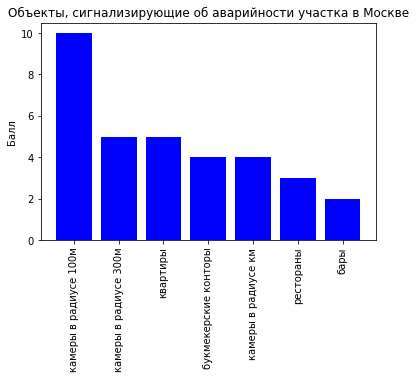

In [339]:
plt.title('Объекты, сигнализирующие об аварийности участка в Москве')
plt.ylabel('Балл')
res = res.sort_values([0], ascending = False)
plt.bar(res.index, round(res[0]/5.3*10), color = 'blue')
plt.xticks(rotation = 90)
plt.show()

In [431]:
res = pd.DataFrame(results.params, index = ['бары', 'рестораны', 'камеры', 'букмекерские конторы', 'квартиры'])

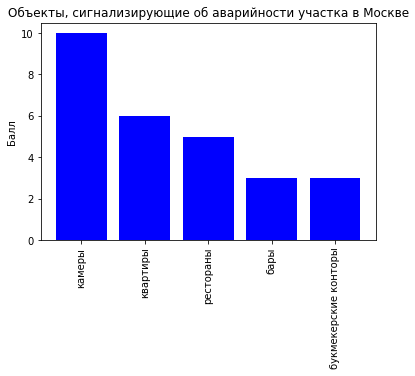

In [432]:
plt.title('Объекты, сигнализирующие об аварийности участка в Москве')
plt.ylabel('Балл')
res = res.sort_values([0], ascending = False)
plt.bar(res.index, round(res[0]/6.1*10), color = 'blue')
plt.xticks(rotation = 90)
plt.show()

In [442]:
df_cor = df[['dtp', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker', 'flats_100', 'school', 'autoschool', 'kindergarden']]

<AxesSubplot:>

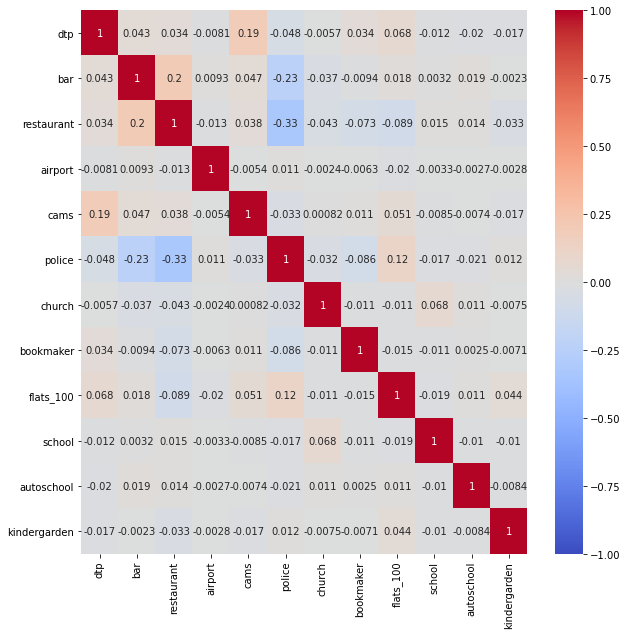

In [443]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(df_cor.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [98]:
X_norfr_ = X_norfr[['org_number', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker']]

In [100]:
#X_norfr_ = df[['org_number', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker']]
model = sm.OLS(y,X_norfr_)
results = model.fit()
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr_.columns[i], results.pvalues[i])
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr_)
    results = model.fit()
print(results.summary())

org_number 0.3967526869986102
                                 OLS Regression Results                                
Dep. Variable:                    dtp   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.089
Method:                 Least Squares   F-statistic:                              108.9
Date:                Fri, 14 May 2021   Prob (F-statistic):                   4.60e-110
Time:                        11:20:27   Log-Likelihood:                         -3008.3
No. Observations:                5554   AIC:                                      6027.
Df Residuals:                    5549   BIC:                                      6060.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [103]:
X_norfr_ = X_norfr[['org_number', 'bar_100', 'restaurant_100', 'airport_100', 'cam_radii_100', 'police_100', 'church_100', 'book_100']]

In [106]:
#X_norfr_ = df[['org_number', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker']]
model = sm.OLS(y,X_norfr_)
results = model.fit()
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr_.columns[i], results.pvalues[i])
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr_)
    results = model.fit()
print(results.summary())

bar_100 0.5937971172204097
                                 OLS Regression Results                                
Dep. Variable:                    dtp   R-squared (uncentered):                   0.091
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              276.8
Date:                Fri, 14 May 2021   Prob (F-statistic):                   2.54e-115
Time:                        11:23:15   Log-Likelihood:                         -3004.3
No. Observations:                5554   AIC:                                      6013.
Df Residuals:                    5552   BIC:                                      6026.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [108]:
X_norfr_ = X_norfr[['org_number', 'bar_200', 'restaurant_200', 'airport_200', 'cam_radii_300', 'police_200', 'church_200', 'book_200']]

In [109]:
model = sm.OLS(y,X_norfr_)
results = model.fit()
n = len(results.pvalues)
i = 0
while max(results.pvalues)>0.05 and i<n:
    if results.pvalues[i] == max(results.pvalues):
        print(X_norfr_.columns[i], results.pvalues[i])
        X_norfr_ = X_norfr_.loc[:, X_norfr_.columns != X_norfr_.columns[i]]
        n-=1
        i = 0
    i+=1
    model = sm.OLS(y,X_norfr_)
    results = model.fit()
print(results.summary())

bar_200 0.8186486299088263
police_200 0.7598387144337964
airport_200 0.6828226460974025
restaurant_200 0.31332001546913085
church_200 0.28685899376002794
                                 OLS Regression Results                                
Dep. Variable:                    dtp   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              161.5
Date:                Fri, 14 May 2021   Prob (F-statistic):                   2.23e-100
Time:                        11:25:07   Log-Likelihood:                         -3035.8
No. Observations:                5554   AIC:                                      6078.
Df Residuals:                    5551   BIC:                                      6098.
Df Model:                           3                                                  
Covariance Type:            nonrobust                 

In [131]:
res = pd.DataFrame(results.params, index = X_norfr.columns)

In [142]:
res = res.sort_values([0])

In [146]:
res

,0
bar_1500,-7.424068
flats_200,-4.944021
banquet_1000,-4.736882
org_number,-4.334626
book_1500,-3.154561
book_500,-1.695196
cam_radii_300,1.501608
bar,1.735522
book_100,1.770664
flats_100,1.802162


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

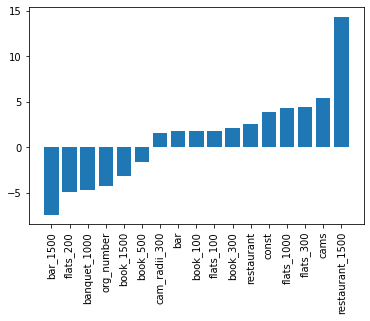

In [147]:
plt.bar(res.index, res[0])
plt.xticks(rotation = 90)

In [126]:
results.params

array([ 3.82760729, -4.3346263 ,  1.73552217,  2.54088409,  5.36024114,
        1.7706639 , -4.73688215, -7.42406822,  2.07966074, -1.69519602,
       -3.15456073, 14.32075053,  1.50160763,  1.80216173, -4.94402131,
        4.45438384,  4.24984742])

In [29]:
results.pvalues

Intercept     0.000037
org_number    0.643340
bar           0.773646
restaurant    0.591743
banquet       0.934851
                ...   
flats_200     0.001880
flats_300     0.003810
flats_500     0.085263
flats_1000    0.001291
flats_1500    0.115025
Length: 62, dtype: float64

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtp   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.978
Date:                Thu, 13 May 2021   Prob (F-statistic):           3.53e-51
Time:                        11:16:59   Log-Likelihood:                -2878.0
No. Observations:                5554   AIC:                             5874.
Df Residuals:                    5495   BIC:                             6265.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0544      0.013      4.130      0.000       0.029       0.080
org_number         -0.0174      0.038     -0.463      0.643      -0.091       0.056
bar                 0.0111      0.039      0.288      0.774      -0.065       0.087
restaurant          0.0204      0.038      0.536      0.592      -0.054       0.095
banquet            -0.0033      0.040     -0.082      0.935      -0.081       0.075
police             -0.0193      0.038     -0.503      0.615      -0.095       0.056
bookmaker           0.0062      0.044      0.139      0.890      -0.081       0.093
church             -0.0210      0.062     -0.338      0.736      -0.143       0.101
airport            -0.0115      0.255     -0.045      0.964      -0.511       0.488
cams                0.3166      0.027     11.516      0.000       0.263       0.371
airport_100         0.0265      0.221      0.120      0.904      -0.407       0.460
banquet_100         0.0002      0.005      0.044      0.965      -0.010       0.010
bar_100             0.0042      0.003      1.514      0.130      -0.001       0.010
book_100            0.0257      0.010      2.461      0.014       0.005       0.046
church_100          0.0379      0.045      0.845      0.398      -0.050       0.126
police_100          0.0246      0.208      0.118      0.906      -0.383       0.433
restaurant_100     -0.0035      0.002     -1.694      0.090      -0.008       0.001
airport_200         0.0215      0.425      0.051      0.960      -0.812       0.855
banquet_200        -0.0019      0.003     -0.558      0.577      -0.009       0.005
bar_200            -0.0017      0.002     -0.897      0.370      -0.005       0.002
book_200           -0.0074      0.008     -0.977      0.329      -0.022       0.007
church_200         -0.0147      0.040     -0.371      0.711      -0.093       0.063
police_200          0.0246      0.208      0.118      0.906      -0.383       0.433
restaurant_200      0.0016      0.001      1.227      0.220      -0.001       0.004
airport_300        -0.0237      0.454     -0.052      0.958      -0.914       0.867
airport_500        -0.0293      0.227     -0.129      0.897      -0.474       0.415
airport_1000       -0.0032      0.073     -0.044      0.965      -0.146       0.139
airport_1500       -0.0032      0.073     -0.044      0.965      -0.146       0.139
banquet_300         0.0008      0.003      0.309      0.757      -0.004       0.006
banquet_500         0.0009      0.001      0.646      0.518      -0.002       0.004
banquet_1000       -0.0016      0.001     -2.326      0.020      -0.003      -0.000
banquet_1500    -7.339e-05      0.001     -0.146      0.884      -0.001       0.001
bar_300             0.0003      0.001      0.234      0.815      -0.002       0.003
bar_500         -1.087e-05      0.001     -0.014      0.988

In [14]:
model = sm.OLS(y,X_norm)

NameError: name 'X_norm' is not defined

In [ ]:
results = model.fit()

In [122]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtp   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     41.13
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                -40600.
No. Observations:               49517   AIC:                         8.131e+04
Df Residuals:                   49463   BIC:                         8.178e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8685      1.314     25.009      0.000      30.293      35.445
x1          1.204e+12   2.55e+12      0.472      0.637   -3.79e+12     6.2e+12
x2          -5.08e+11   1.08e+12     -0.472      0.637   -2.62e+12     1.6e+12
x3         -6.198e+11   1.31e+12     -0.472      0.637   -3.19e+12    1.95e+12
x4         -3.387e+11   7.17e+11     -0.472      0.637   -1.74e+12    1.07e+12
x5         -4.335e+11   9.18e+11     -0.472      0.637   -2.23e+12    1.37e+12
x6         -2.228e+11   4.72e+11     -0.472      0.637   -1.15e+12    7.02e+11
x7         -1.279e+11   2.71e+11     -0.472      0.637   -6.59e+11    4.03e+11
x8         -4.155e+10    8.8e+10     -0.472      0.637   -2.14e+11    1.31e+11
x9            21.4073      0.562     38.081      0.000      20.306      22.509
x10            0.1693      0.789      0.215      0.830      -1.377       1.716
x11            0.0351      0.918      0.038      0.970      -1.764       1.835
x12           -0.1908      1.230     -0.155      0.877      -2.601       2.219
x13            0.3821      0.853      0.448      0.654      -1.290       2.054
x14            0.6256      0.703      0.889      0.374      -0.753       2.004
x15         9.236e+12   1.87e+13      0.494      0.621   -2.74e+13    4.59e+13
x16           -3.7814      1.351     -2.798      0.005      -6.430      -1.133
x17            0.4137      2.804      0.148      0.883      -5.082       5.910
x18           -0.3447      1.501     -0.230      0.818      -3.286       2.597
x19           -1.1458      2.333     -0.491      0.623      -5.718       3.426
x20           -0.4847      1.165     -0.416      0.677      -2.767       1.798
x21            0.0648      1.089      0.060      0.953      -2.069       2.199
x22        -9.236e+12   1.87e+13     -0.494      0.621   -4.59e+13    2.74e+13
x23            2.0137      2.612      0.771      0.441      -3.106       7.133
x24           -0.2580      3.054     -0.084      0.933      -6.243       5.727
x25           -0.4882      1.719     -0.284      0.776      -3.858       2.881
x26         1.259e+10   2.55e+10      0.494      0.621   -3.74e+10    6.26e+10
x27        -1.259e+10   2.55e+10     -0.494      0.621   -6.26e+10    3.74e+10
x28            0.1829      1.705      0.107      0.915      -3.159       3.525
x29            0.8652      1.740      0.497      0.619      -2.544       4.275
x30           -6.6653      2.697     -2.472      0.013     -11.950      -1.380
x31            4.0438      4.026      1.004      0.315      -3.847      11.935
x32            0.7510      2.974      0.253      0.801      -5.078       6.580
x33            0.8308      3.583      0.232      0.817      -6.191       7.853
x34            1.2592      6.284      0.200      0.841     -11.057      13.575
x35          -10.2166      7.554     -1.352      0.176     -25.023       4.590
x3

In [123]:
X_norm

array([[0.00449389, 0.00264035, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00449389, 0.00264035, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00449389, 0.01056141, 0.01250978, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00449389, 0.00264035, 0.        , ..., 0.00182784, 0.00088715,
        0.00108246],
       [0.00449389, 0.00264035, 0.        , ..., 0.00365568, 0.00532288,
        0.00162368],
       [0.00449389, 0.00264035, 0.        , ..., 0.00365568, 0.00177429,
        0.00108246]])

In [16]:
clf = RandomForestRegressor(n_estimators = 100, n_jobs = 10)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
masker = shap.maskers.Independent(data=X)

In [53]:
rs = clf.fit(X, y)

In [54]:
explainer = shap.Explainer(rs, masker = masker)

In [55]:
shap_values = explainer.shap_values(X)

100%|===================| 5527/5554 [02:38<00:00]        

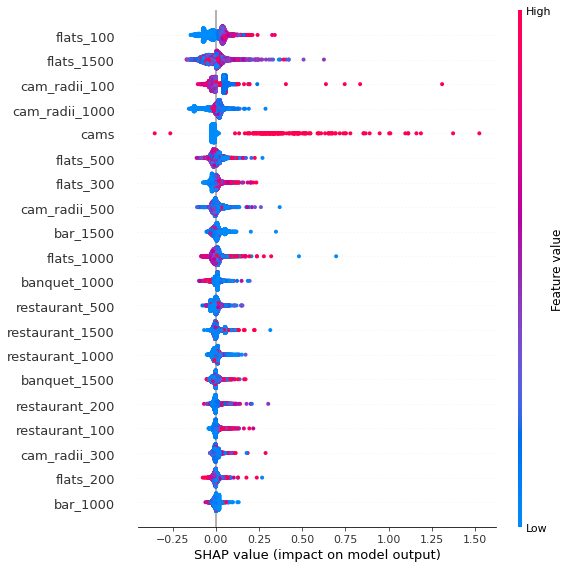

In [58]:
shap.summary_plot(shap_values, features = X)

In [362]:
features = '+'.join(df.columns)

In [363]:
features

'city_id+square_id+org_number+bar+restaurant+banquet+police+bookmaker+church+airport+cams+dtp+airport_100+banquet_100+bar_100+book_100+church_100+police_100+restaurant_100+airport_200+banquet_200+bar_200+book_200+church_200+police_200+restaurant_200+airport_300+airport_500+airport_1000+airport_1500+banquet_300+banquet_500+banquet_1000+banquet_1500+bar_300+bar_500+bar_1000+bar_1500+book_300+book_500+book_1000+book_1500+church_300+church_500+church_1000+church_1500+police_300+police_500+police_1000+police_1500+restaurant_300+restaurant_500+restaurant_1000+restaurant_1500+cam_radii_100+cam_radii_300+cam_radii_500+cam_radii_1000+flats_100+flats_200+flats_300+flats_500+flats_1000+flats_1500'

In [366]:
features = 'org_number+bar+restaurant+banquet+police+bookmaker+church+airport+cams+dtp+airport_100+banquet_100+bar_100+book_100+church_100+police_100+restaurant_100+airport_200+banquet_200+bar_200+book_200+church_200+police_200+restaurant_200+airport_300+airport_500+airport_1000+airport_1500+banquet_300+banquet_500+banquet_1000+banquet_1500+bar_300+bar_500+bar_1000+bar_1500+book_300+book_500+book_1000+book_1500+church_300+church_500+church_1000+church_1500+police_300+police_500+police_1000+police_1500+restaurant_300+restaurant_500+restaurant_1000+restaurant_1500+cam_radii_100+cam_radii_300+cam_radii_500+cam_radii_1000+flats_100+flats_200+flats_300+flats_500+flats_1000+flats_1500'

In [367]:
y, X = dmatrices('dtp ~' + features, df, return_type='dataframe')

In [368]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

divide by zero encountered in double_scalars


In [369]:
pd.set_option('display.max_rows', None)
vif

,VIF Factor,features
0,5.787892,Intercept
1,inf,org_number
2,inf,bar
3,inf,restaurant
4,inf,banquet
5,inf,police
6,inf,bookmaker
7,inf,church
8,inf,airport
9,1.254695,cams


In [ ]:
X_norfr_ = X_norfr[['org_number', 'bar', 'restaurant', 'airport', 'cams', 'police', 'church', 'bookmaker', 'flats_100']]

In [155]:
score5 = cross_val_score(clf, X, y, cv = kf, scoring = 'r2')

In [156]:
score5

array([-0.12652732, -0.01890567, -0.07487473,  0.0394066 , -0.00852672])

In [354]:
clf4 = ElasticNet(random_state=0, alpha = 0.01)

In [355]:
score4 = cross_val_score(clf4, X, y, cv = kf, scoring = 'neg_mean_squared_error')

In [356]:
score4

array([-0.15292861, -0.15234277, -0.18953482, -0.19497725, -0.16038122])

In [188]:
clf6 = xgboost.XGBRegressor(eta = 0.01)

In [201]:
score6 = cross_val_score(clf6, X, y, cv = kf, scoring = 'neg_mean_squared_error')

In [202]:
score6

array([-0.177877  , -0.18678218, -0.20762297, -0.21366691, -0.18751043])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state=42)

In [138]:
# calculate the economy SVD for the data matrix A
U,S,Vt = np.linalg.svd(X_train, full_matrices=False)

In [139]:
# solve Ax = b for the best possible approximate solution in terms of least squares
x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train

In [144]:

# perform train and test inference
y_pred = X_train @ x_hat
test_predictions = X_test @ x_hat
train_predictions = X_train @ x_hat

In [145]:
# compute train and test MSE
train_mse = np.mean((train_predictions - y_train)**2)
test_mse = np.mean((test_predictions - y_test)**2)

In [146]:
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 0.30950706179945264
Test Mean Squared Error: 0.2711832048707444


In [147]:
x_hat

array([ 1.48668717e-01,  1.78474866e+09, -1.78474866e+09, -1.78474866e+09,
       -1.78474866e+09, -1.78474866e+09, -1.78474865e+09, -1.78474866e+09,
       -1.78474866e+09,  6.14631153e-01,  5.79078333e-02, -1.69194336e-03,
        6.82349211e-04,  7.54993791e-03,  5.75677210e-02, -2.85664745e+10,
       -6.00243584e-03,  7.71136689e-02, -1.35312393e-03, -2.58231762e-03,
       -7.65305464e-03,  1.12349596e-02,  2.85664745e+10,  1.59114101e-03,
       -5.40313006e-02, -7.51507145e-02,  2.01260504e+10, -2.01260504e+10,
       -1.70109185e-04,  2.82002308e-03, -1.88119488e-03,  2.96748842e-04,
        1.11282092e-03,  1.58428838e-04,  3.93884261e-04, -4.79021520e-04,
        1.74420769e-02, -5.64300077e-03, -3.75895154e-04, -3.18554813e-03,
       -2.20037323e-02,  1.26383534e-02, -8.22859336e-03,  2.85060834e-03,
       -3.65781801e-02, -7.53350898e-02, -1.47257504e-01,  9.88459435e-02,
        7.86272393e-04, -1.55225449e-03, -2.23982214e-05,  4.74809181e-04,
       -3.45563689e-02,  

In [148]:
S

array([4.33579046e+04, 3.78414428e+03, 3.20299740e+03, 2.10696144e+03,
       1.76550669e+03, 9.31757548e+02, 8.53104362e+02, 8.20974628e+02,
       6.77771460e+02, 5.53466458e+02, 4.71512321e+02, 4.41426940e+02,
       4.15770469e+02, 4.01250367e+02, 3.81809505e+02, 3.38073849e+02,
       2.48337910e+02, 2.13954871e+02, 2.02903692e+02, 1.94493256e+02,
       1.80194781e+02, 1.55373064e+02, 1.40235475e+02, 1.31103780e+02,
       1.16005848e+02, 1.12920442e+02, 9.71106597e+01, 9.42494425e+01,
       9.14150700e+01, 8.69747368e+01, 7.73549227e+01, 7.04417300e+01,
       6.57895668e+01, 5.37725700e+01, 3.80126132e+01, 3.60366546e+01,
       3.46509925e+01, 3.12348023e+01, 2.95747880e+01, 1.95573221e+01,
       1.92387954e+01, 1.48266025e+01, 1.25357973e+01, 9.37193052e+00,
       9.25037332e+00, 6.87836368e+00, 5.70198080e+00, 2.88586131e+00,
       1.75486628e+00, 1.16902432e+00, 1.05620893e+00, 6.42269924e-01,
       5.99296185e-01, 1.92547776e-11, 4.26158847e-12, 4.26158847e-12])